# Day 09 Pre-Class Assignment:<br> Numerical Integration: The Trapezoidal Rule and Simpson's Rule

### <p style="text-align: right;"> &#9989; Cesarine Graham</p>


## Goals of this assignment

The goals of this assignment are:

* Learn about the trapezoidal rule and Simpson's rule
* Write code to apply these rules to simple integrals

## Assignment instructions

Upload the assignment to Gradescope before noon the day of the next class.

---
## Part 0: Why Numerical Integration?
One of the most basic but also most important applications of computers in physics is the evaluation of integrals and derivatives.
Numerical evaluation of integrals is a particularly crucial topic, because integrals occur in physical calculations and, while some integrals can be done analytically in closed form, most cannot.
They can, however, usually be done on a computer (or supercomputer).
In this week's classes, we will examine a number of different techniques for evaluating integrals and discuss their associated errors.

## Part 1: The Trapezoidal Rule

Very often, we need to evaluate the integral of a function.
Let us consider initially the simplest case, the integral of a function of a single variable over a finite range.
We will start with the most basic and also most widely used rule, the _trapezoidal rule_.

### 1.1 Learn about the trapezoidal rule
Let's first learn about the trapezoidal rule by watching the video below (and looking at a simple example).

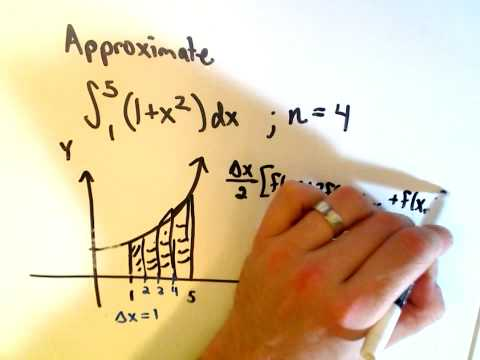

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("8z6JRFvjkpc",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=8z6JRFvjkpc

To summarize what we learn from this video:

Suppose we have a function $f(x)$ and we want to calculate its integral with respect to $x$ from $x=a$ to $x=b$, which we denote $I(a,b)$

$$ I(a,b) = \int_a^b dx\, f(x), $$

which is equivalent to calculating the area under the curve of $f(x)$ from $a$ to $b$.

We divide the interval from  $a$ to $b$ into $N$ slices, so that each slice has width $h=\frac{b-a}{N}$.
The $k$th slice's part of the interval goes from $a+(k-1)h$ to $a+kh$;
thus, its area is

$$ A_k = \frac{1}{2}h \left[f(a+(k-1)h)+f(a+kh)\right]. $$

This is the trapezoidal rule, since the shape of the slice area is a trapezoid.

From the steps of the derivation of the trapezoidal rule shown in the video above, the approximation of the area under the whole curve is the sum of the areas of the trapezoids for all $N$ slices:

$$ I(a,b) \approx \sum_{k=1}^N A_k =  h\left[\frac{1}{2}f(a)+\frac{1}{2}f(b)+ \sum_{k=1}^{N-1} f(a+kh)\right] $$


### 1.2 Apply the Trapezoidal Rule
Now let's test your understanding by trying out a simple example.
In the following cell, use the trapezoidal rule to calculate the integral of $x^4-2x+1$ from $x=0$ to $x=2$.
(Yes, I know you can do this by hand quickly, but let's flex our programming skills on this!)

Write the program to do the integration using the trapezoidal rule (as shown in the formula above) with $N=10$ slices.
(The correct output would be around 4.5.)
Then, make a graph showing the result for various $N$ between 10 and 200 in steps of 10.

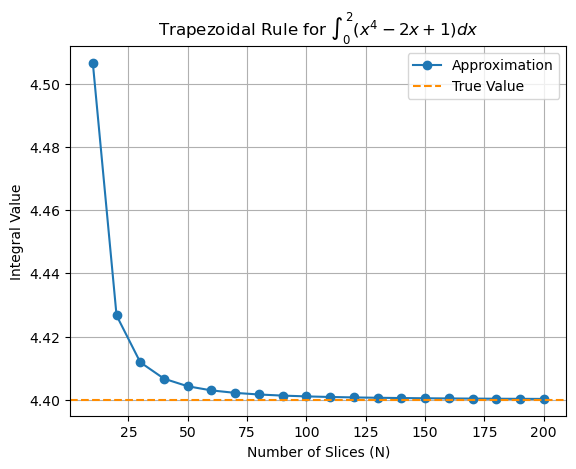

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# defining the function to integrate
def function_to_integrate(x):
    return x**4 - 2*x + 1

# defining the trapezoidal rule
def trapezoidal_rule_integration(a, b, N):
    h = (b-a) / N # calculating the width of each interval
    result = 0.5 * (function_to_integrate(a) + function_to_integrate(b)) # initializing result with avg of function values at endpoints
    
    for k in range(1, N): # summing the function values at each interior point
        result += function_to_integrate(a + k * h)
    result *= h  # multiplying the sum by the width of each subinterval
    return result # returning the final result

# defining the interval [a, b]
a = 0
b = 2

# number of slices (N)
Ns = np.arange(10, 201, 10)

# calculating the integral for various values of N
results = [trapezoidal_rule_integration(a, b, N) for N in Ns]

# plotting
plt.plot(Ns, results, marker='o', linestyle='-', label='Approximation')
plt.axhline(y=4.4, color='darkorange', linestyle='--', label='True Value')
plt.xlabel('Number of Slices (N)')
plt.ylabel('Integral Value')
plt.title('Trapezoidal Rule for $\int_{0}^{2} (x^4 - 2x + 1) dx$')
plt.grid(True)
plt.legend()
plt.show()

---
## Part 2: Simpson's Rule

The trapezoidal rule is one of the simplest numerical-integration methods, taking only a few lines of code, but it is often adequate for calculations where no great accuracy is required.
However, sometimes physics problem require higher accuracy, and this is not always achievable with the trapezoidal rule even with increasing numbers of slices.
Simpson's rule uses a quadratic curve to approximate the area under the function; to do so, one needs 3 points (instead of 2 as in the trapezoidal rule case).
Watch the video below to learn how this works:

### 2.1 Learn about Simpson's rule

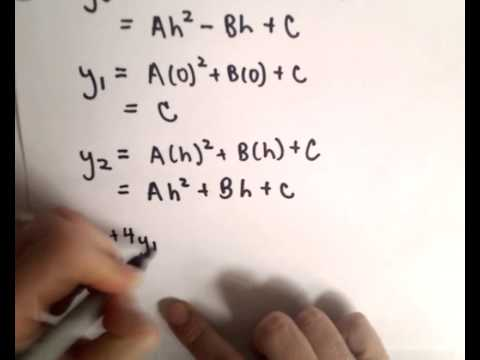

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("7MoRzPObRf0",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=7MoRzPObRf0

To summarize what we learn from this video :

We are still working with a function $f(x)$, wanting to its integral with respect to $x$ from $x=a$ to $x=b$, which we denote $I(a,b)$

$$ I(a,b) = \int_a^b dx\, f(x), $$

which is equivalent to calculating the area under the curve of $f(x)$ from $a$ to $b$.

Instead of using a straight line across the top to approximate the area, we now use a quadratic function to approximate the curvature.
Again, we divide the interval from  $a$ to $b$ into $N$ slices, so that each slice has width $h=\frac{b-a}{N}$.
The $k$th slice's part of the interval goes from $a+(k-1)h$ to $a+kh$;
thus, its area is

$$ A_k= \frac{1}{3}h \left[f(a+k h)+ 4 f(a+(k+1)h) + f(a+(k+2)h) \right]. $$

Note that the total number of slices must be _even_ for this to work.
Collecting the terms together, we now have

$$\begin{align}
I(a,b) &\approx \sum_1^N A_k \\
       &=  \frac{1}{3}h \left[f(a) + 4 f(a+h) + 2 f(a+2h) + 4 f(a+3h) + \ldots  +f(b) \right] \\
       &=  \frac{1}{3}h \left[f(a)+f(b) + 4 \sum_{\text{odd } k=1}^{N-1} f(a+k h) + 2 \sum_{\text{even }k= 2}^{N-2} f(a+ kh)  \right]
\end{align}$$

### 2.2 Apply Simpson's rule
Now, let's test your understanding by trying out a simple example.
In the following cell, use Simpson's rule to calculate the integral of $x^4-2x+1$ from $x=0$ to $x=2$.

Write the program to do the integration using Simpson's rule (as shown in the formula above) with $N=10$ slices.
Then, make a graph showing the result for various $N$ between 10 and 200 in steps of 10.
Does the the Simpson's rule converge to the true answer faster?

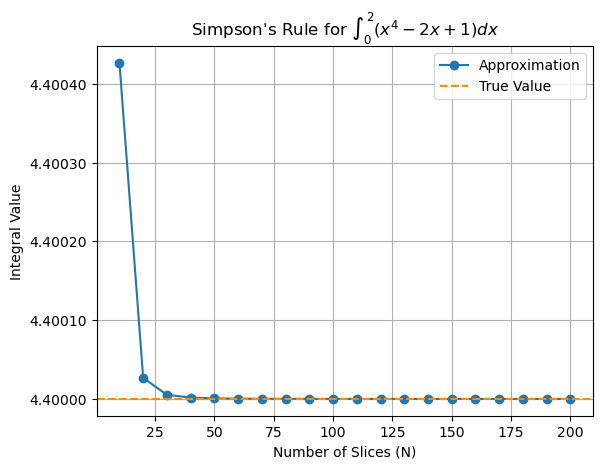

In [4]:
from matplotlib.ticker import FuncFormatter #needed for the accuracy of this plot

# defining the function to integrate
def function_to_integrate(x):
    return x**4 - 2*x + 1

# defining the simpsons rule
def simpsons_rule_integration(a, b, N):
    h = (b-a) / N # calculating the width of each interval
    result = function_to_integrate(a) + function_to_integrate(b) # iniitalizing result with values at endpoints
    
    for k in range(1, N, 2): # for ODD numbers
        result += 4 * function_to_integrate(a + k * h) 
    for k in range(2, N-1, 2): # for EVEN numbers
        result += 2 * function_to_integrate(a + k * h) 

    result *= h / 3 # multiplying the sum by the width and divide by 3
    return result  # returning the final result 

# defining the interval [a, b]
a = 0
b = 2

# number of slices (N)
Ns = np.arange(10, 201, 10)

# calculating the integral for various values of N
results_simpson = [simpsons_rule_integration(a, b, N) for N in Ns]

# plotting
plt.plot(Ns, results_simpson, marker='o', linestyle='-', label='Approximation')
plt.axhline(y=4.4, color='darkorange', linestyle='--', label='True Value')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.5f}".format(x))) #formatting the yaxis (more sigfig)
plt.xlabel('Number of Slices (N)')
plt.ylabel('Integral Value')
plt.title('Simpson\'s Rule for $\int_{0}^{2} (x^4 - 2x + 1) dx$')
plt.grid(True)
plt.legend()
plt.show()

<font color='blue'>

Simpson's rule converged to the answer faster than the trapezoidal rule for a given number of intervals ($N$). The Simpson's rule uses quadratic polynomials to approximate the function between each pair of adjacent points, while the trapezoidal rule uses linear approximations. Quadratic approximations generally provide a better fit to the shape of the function, especially for functions with curvature, which is why the method was able to get the answer within the first iteration.

---
## Assignment Wrap-up


Please submit your notebook **in ipynb format** to Gradescope.

**You must complete the pre-class survey in order to receive credit for the assignment!**